In [12]:

from porcaro.utils import TimeSignature
from porcaro.processing.grid import get_eighth_note_grid_from_df
from porcaro.processing.grid import sync_eighth_note_grid_to_onsets
from porcaro.processing.onset import get_librosa_onsets
from porcaro.processing.sheet import construct_sheet
from porcaro.processing.matching import match_by_eighth_notes
from porcaro.visualisation.track import plot_track
from porcaro.processing.transcription import _load_song_data
from porcaro.processing.transcription import _run_prediction_on_track

In [4]:
time_sig = TimeSignature(4, 4)
offset = 10.0
duration = 10.0
fpath = '/home/matt/dev/git/porcaro/api/notebooks/drum_track.wav'
start_beat = 3.5
resolution = 16

In [13]:
track, song_data = _load_song_data(fpath, time_sig, start_beat, offset, duration)
onsets = get_librosa_onsets(
        track, song_data.sample_rate, hop_length=1024 if song_data.bpm < 110 else 512
    )
df = _run_prediction_on_track(track, onsets, song_data, resolution)

In [14]:
grid = get_eighth_note_grid_from_df(df, song_data)
grid = sync_eighth_note_grid_to_onsets(
    grid, df.peak_time, song_data.bpm.thirty_second_note
)
note_predictions = df[['peak_time', 'hits']].copy()
# tolerance is set to 0.0 as the grid is already synced to the onsets
matched_durations, matched_notes = match_by_eighth_notes(
    grid, note_predictions, time_sig=song_data.time_signature, tolerance=0.0
)

In [15]:
matched_notes

['REST',
 'REST',
 'REST',
 'REST',
 ['SD'],
 ['SD'],
 ['SD'],
 ['SD'],
 ['SD'],
 ['SD'],
 ['KD'],
 ['KD'],
 ['SD'],
 ['SD'],
 ['KD'],
 ['KD'],
 ['KD'],
 ['KD'],
 ['KD'],
 ['KD'],
 ['KD'],
 ['KD'],
 ['KD'],
 ['KD'],
 ['SD'],
 ['SD'],
 ['KD'],
 ['KD'],
 ['KD'],
 ['KD'],
 ['KD'],
 ['KD'],
 ['KD'],
 ['KD'],
 ['KD'],
 ['KD'],
 ['KD'],
 ['KD'],
 ['SD'],
 ['SD'],
 ['SD'],
 ['SD'],
 ['KD'],
 ['KD'],
 ['SD'],
 ['KD'],
 ['KD'],
 ['KD'],
 ['KD'],
 ['SD'],
 ['KD']]

In [16]:
# Construct the sheet music
sheet = construct_sheet(matched_durations, matched_notes, time_sig)

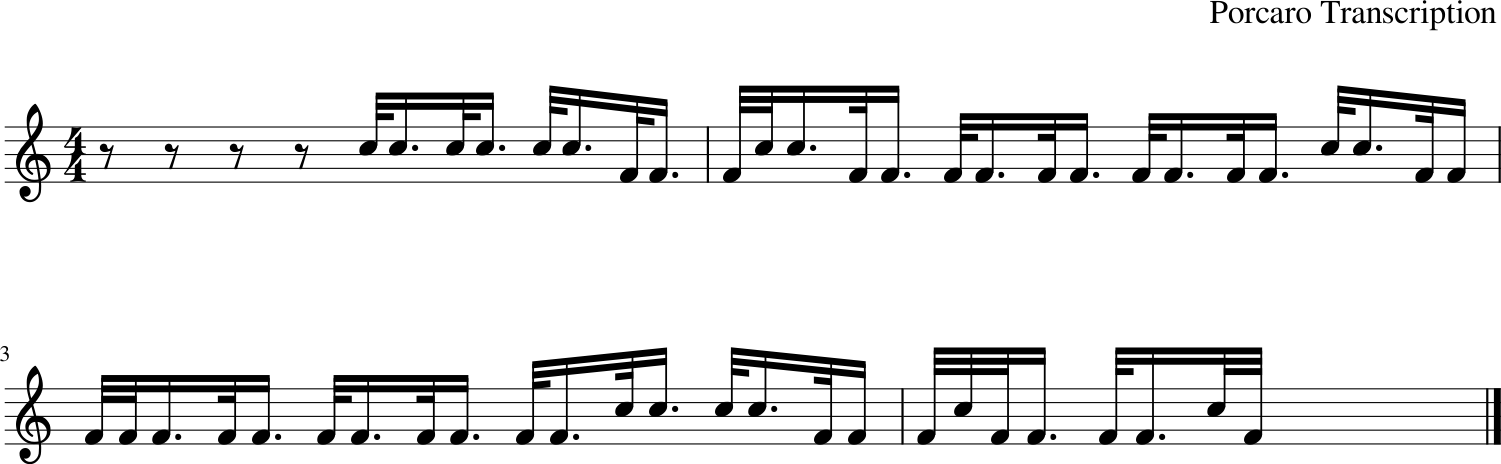

In [17]:
sheet.show()

In [ ]:
# upto here: investigate why the timing is off

In [91]:
grid = get_eighth_note_grid_from_df(df, song_data)
synced_grid = sync_eighth_note_grid_to_onsets(
    grid, df.peak_time, song_data.bpm.thirty_second_note
)

In [92]:
grid

array([3.0185941 , 3.25079365, 3.4829932 , 3.71519274, 3.94739229,
       4.17959184, 4.41179138, 4.64399093, 4.87619048, 5.10839002,
       5.34058957, 5.57278912, 5.80498866, 6.03718821, 6.26938776,
       6.5015873 , 6.73378685, 6.96598639, 7.19818594, 7.43038549,
       7.66258503, 7.89478458, 8.12698413, 8.35918367, 8.59138322,
       8.82358277, 9.05578231, 9.28798186, 9.52018141, 9.75238095,
       9.9845805 ])

In [97]:
synced_grid

array([3.0185941 , 3.25079365, 3.4829932 , 3.71519274, 3.94739229,
       4.17959184, 4.41179138, 4.64399093, 4.89941043, 5.10839002,
       5.34058957, 5.57278912, 5.80498866, 6.01396825, 6.26938776,
       6.5015873 , 6.71056689, 6.96598639, 7.17496599, 7.40716553,
       7.63936508, 7.87156463, 8.10376417, 8.31274376, 8.54494331,
       8.77714286, 9.05578231, 9.24154195, 9.4737415 , 9.75238095,
       9.9845805 ])

In [ ]:
from porcaro.visualisation.track import add_grid
from porcaro.visualisation.track import add_onsets

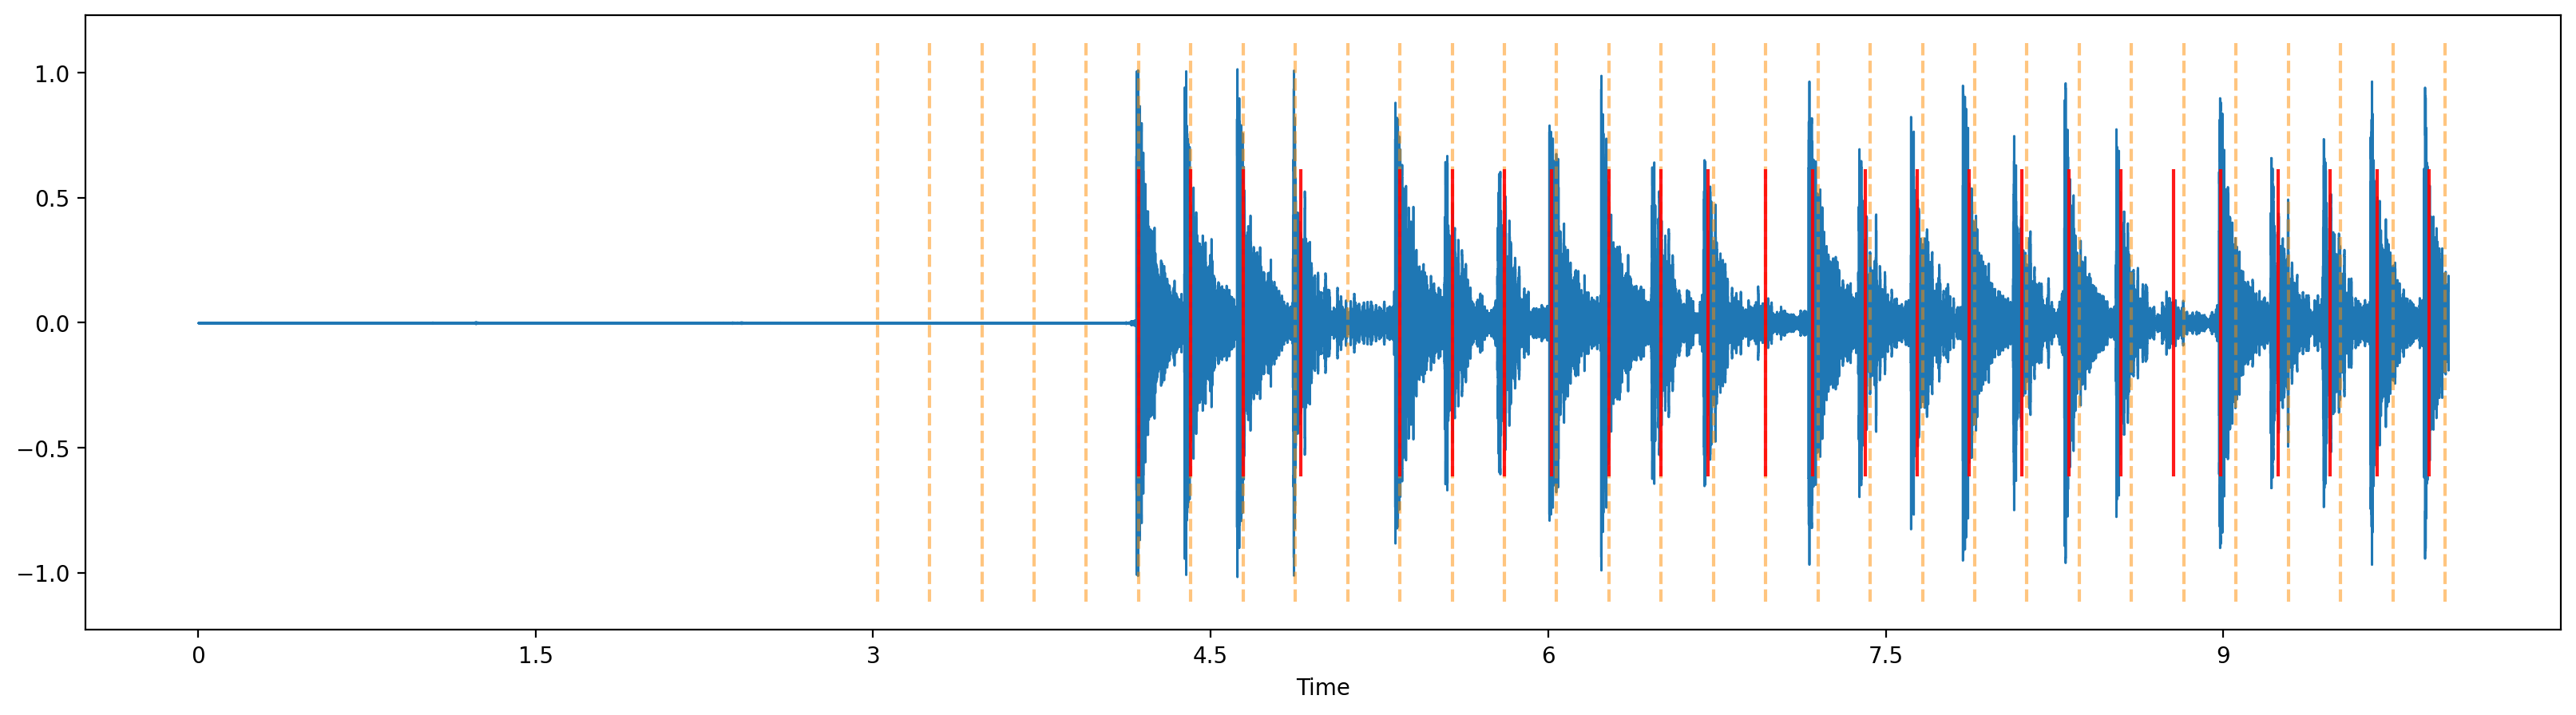

In [109]:
fig, ax = plot_track(y, sr)
add_grid(ax, grid, colour='darkorange')
add_onsets(ax, df.peak_time, colour='r')

The grid seems okay, there may be some mistakes which may require some rethinking but we'll see how it goes